In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
import sklearn.metrics
from sklearn.preprocessing import StandardScaler as SSc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as KM, AgglomerativeClustering as AgC, SpectralClustering as SpC, DBSCAN as DBS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc
%matplotlib inline


#set width of window to preference
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
#year = "2019"                                                     #choose year to get data from
#split = "summer"                                                  #choose split to get data from(spring, summer, worlds)
#infile = r"C:\Users\Triplea657\000 MSCS-335 2020\Datasets\League_"#path
#inf = "-Wrangled.csv"                                             #file to read
#filein = infile+year+"\\"+year+'-'+split+'-'+inf
#data = pd.read_csv(filein,low_memory=False)
#data.head(10)

#changed for submission version
data = pd.read_csv("Datasets/League_2019/2019-summer-Wrangled.csv", index_col=0, low_memory=False)
data.head()

league_CBLoL  league_LCK  league_LCS  league_LEC  league_LMS  gamelength  \
0           0.0         0.0         1.0         0.0         0.0   35.500000   
1           0.0         0.0         1.0         0.0         0.0   35.500000   
2           0.0         0.0         1.0         0.0         0.0   29.700000   
3           0.0         0.0         1.0         0.0         0.0   29.700000   
4           0.0         0.0         1.0         0.0         0.0   31.983333   

   result     k     d     a   fb       kpm      okpm      ckpm   fd  \
0     1.0  21.0  14.0  52.0  0.0  0.591549  0.394366  0.985915  0.0   
1     0.0  14.0  21.0  32.0  1.0  0.394366  0.591549  0.985915  1.0   
2     1.0  11.0   4.0  25.0  1.0  0.370370  0.134680  0.505051  1.0   
3     0.0   4.0  11.0  10.0  0.0  0.134680  0.370370  0.505051  0.0   
4     1.0  12.0   3.0  26.0  1.0  0.375195  0.093799  0.468994  0.0   

      fdtime  teamdragkills  oppdragkills  elementals  oppelementals  \
0  12.556633            2.0           2.0         2.0            2.0   
1  12.556633            2.0           2.0         2.0            2.0   
2  12.306967            2.0           1.0         2.0            1.0   
3  12.306967            1.0           2.0         1.0            2.0   
4  10.158933            3.0           1.0         3.0            1.0   

   firedrakes  waterdrakes  earthdrakes  airdrakes  elders  oppelders  herald  \
0         2.0          0.0          0.0        0.0     0.0        0.0     1.0   
1         1.0          0.0          0.0        1.0     0.0        0.0     0.0   
2         0.0          0.0          1.0        1.0     0.0        0.0     0.0   
3         0.0          1.0          0.0        0.0     0.0        0.0     1.0   
4         1.0          0.0          0.0        2.0     0.0        0.0     0.0   

   heraldtime   ft     fttime  firstmidouter  firsttothreetowers  \
0   13.369417  1.0  15.162683            1.0                 0.0   
1   13.369417  0.0  15.162683            0.0                 1.0   
2   12.377433  1.0  12.791600            1.0                 1.0   
3   12.377433  0.0  12.791600            0.0                 0.0   
4   12.242783  0.0  14.386333            1.0                 1.0   

   teambaronkills  oppbaronkills  dmgtochamps  dmgtochampsperminute  wards  \
0             1.0            0.0      70545.0           1987.183099  109.0   
1             0.0            1.0      71736.0           2020.732394  108.0   
2             1.0            0.0      51538.0           1735.286195   96.0   
3             0.0            1.0      38185.0           1285.690236   93.0   
4             1.0            0.0      49421.0           1545.211047  143.0   

        wpm  wardkills      wcpm  totalgold    earnedgpm  goldspent      gspd  \
0  3.070423       51.0  1.436620    69022.0  1293.464789    65108.0  0.110966   
1  3.042254       37.0  1.042254    61541.0  1082.732394    58263.0 -0.110966   
2  3.232323       44.0  1.481481    59081.0  1330.861953    50910.0  0.135867   
3  3.131313       41.0  1.380471    45794.0   883.488215    44433.0 -0.135867   
4  4.471079       44.0  1.375717    61326.0  1262.351225    54340.0  0.158169   

   monsterkillsownjungle  monsterkillsenemyjungle       cspm  goldat10  \
0                  151.0                     24.0  31.802817   16118.0   
1                  155.0                      4.0  32.985915   15436.0   
2                  102.0                     56.0  35.656566   16270.0   
3                   82.0                      0.0  33.265993   14985.0   
4                  128.0                     18.0  34.299114   16157.0   

   oppgoldat10  gdat10  goldat15  oppgoldat15  gdat15   xpat10  oppxpat10  \
0      15436.0   682.0   24287.0      23616.0   671.0  19260.0    18621.0   
1      16118.0  -682.0   23616.0      24287.0  -671.0  18621.0    19260.0   
2      14985.0  1285.0   27399.0      23026.0  4373.0  19015.0    18226.0   
3      16270.0 -1285.0   23026.0      27399.0 -4373.0  18226.0 

In [3]:
var = []
for i in data:
    var.append(i)
print(var)
for i, v in enumerate(var):
    print(i, v)

['league_CBLoL', 'league_LCK', 'league_LCS', 'league_LEC', 'league_LMS', 'gamelength', 'result', 'k', 'd', 'a', 'fb', 'kpm', 'okpm', 'ckpm', 'fd', 'fdtime', 'teamdragkills', 'oppdragkills', 'elementals', 'oppelementals', 'firedrakes', 'waterdrakes', 'earthdrakes', 'airdrakes', 'elders', 'oppelders', 'herald', 'heraldtime', 'ft', 'fttime', 'firstmidouter', 'firsttothreetowers', 'teambaronkills', 'oppbaronkills', 'dmgtochamps', 'dmgtochampsperminute', 'wards', 'wpm', 'wardkills', 'wcpm', 'totalgold', 'earnedgpm', 'goldspent', 'gspd', 'monsterkillsownjungle', 'monsterkillsenemyjungle', 'cspm', 'goldat10', 'oppgoldat10', 'gdat10', 'goldat15', 'oppgoldat15', 'gdat15', 'xpat10', 'oppxpat10', 'xpdat10', 'csat10', 'oppcsat10', 'csdat10', 'csat15', 'oppcsat15', 'csdat15']
0 league_CBLoL
1 league_LCK
2 league_LCS
3 league_LEC
4 league_LMS
5 gamelength
6 result
7 k
8 d
9 a
10 fb
11 kpm
12 okpm
13 ckpm
14 fd
15 fdtime
16 teamdragkills
17 oppdragkills
18 elementals
19 oppelementals
20 firedrakes
21

In [4]:
#transform input data (normalize scaling)
ssc = SSc()
data = pd.DataFrame(ssc.fit_transform(data))

In [5]:
n_samples, n_features = data.shape
print("n_samples  {} \nn_features {}".format(n_samples, n_features))

n_samples  1444 
n_features 62


##### Within cluster sum of squares (WCSS) for determining number of clusters to use (elbow method)

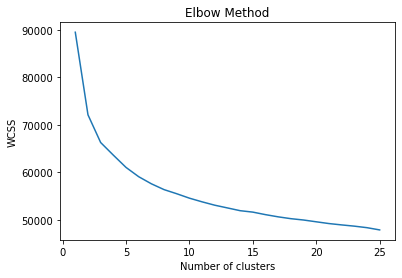

In [6]:
wcss = []
for i in range(1, 26):
    kmeans = KM(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 26), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
def kmcluster(X, nclusters):
    km = KM(n_clusters=nclusters, random_state=2020).fit(X)
    return km

	Using K-means clustering
	The white Xs are the centroids of each cluster


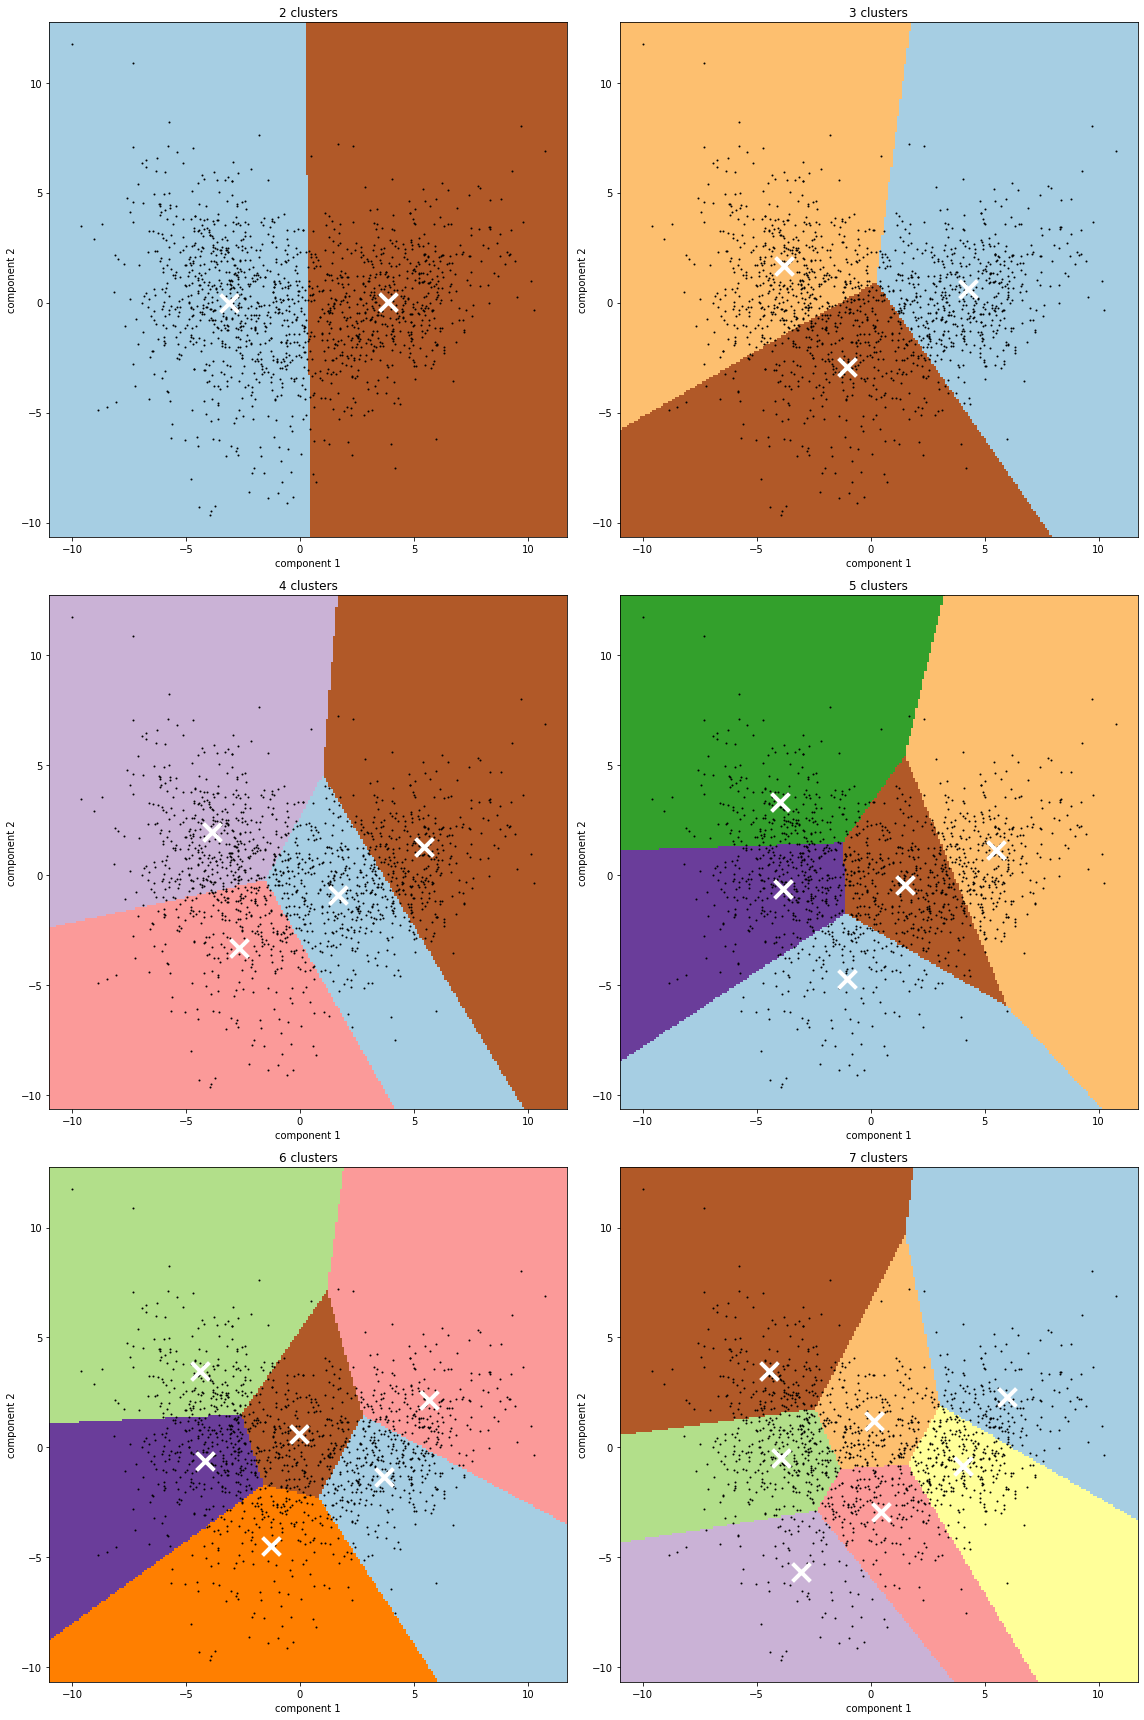

In [8]:
print("\tUsing K-means clustering\n\tThe white Xs are the centroids of each cluster")

reduced_data = PCA(n_components=2).fit_transform(data)

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
def addSubplot(subplt_n, reduced_data, n_clstrs):
    meshstep = 0.1
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, meshstep), np.arange(y_min, y_max, meshstep))
    kmeans = KM(init='k-means++', n_clusters=n_clstrs, n_init=10)
    kmeans.fit(reduced_data)
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[subplt_n].imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')
    axes[subplt_n].plot(reduced_data[:,0], reduced_data[:,1], 'k.', markersize=2)
    for cluster in range(0, kmeans.cluster_centers_.shape[0]):
        axes[subplt_n].scatter(kmeans.cluster_centers_[cluster, 0], kmeans.cluster_centers_[cluster, 1],
                    marker='x', s=320, linewidths=4,
                    label='Cluster ' + str(cluster),
                    color='w', zorder=4)#, hold=True)
        axes[subplt_n].set_title('{} clusters'.format(n_clstrs))
        axes

for i in range(2,8):
    addSubplot(i-2, reduced_data, i)
for ax in axes:
    ax.set(xlabel='component 1', ylabel='component 2')
plt.tight_layout()
plt.show()

	Another graphing method using KMeans clustering



<Figure size 432x288 with 0 Axes>

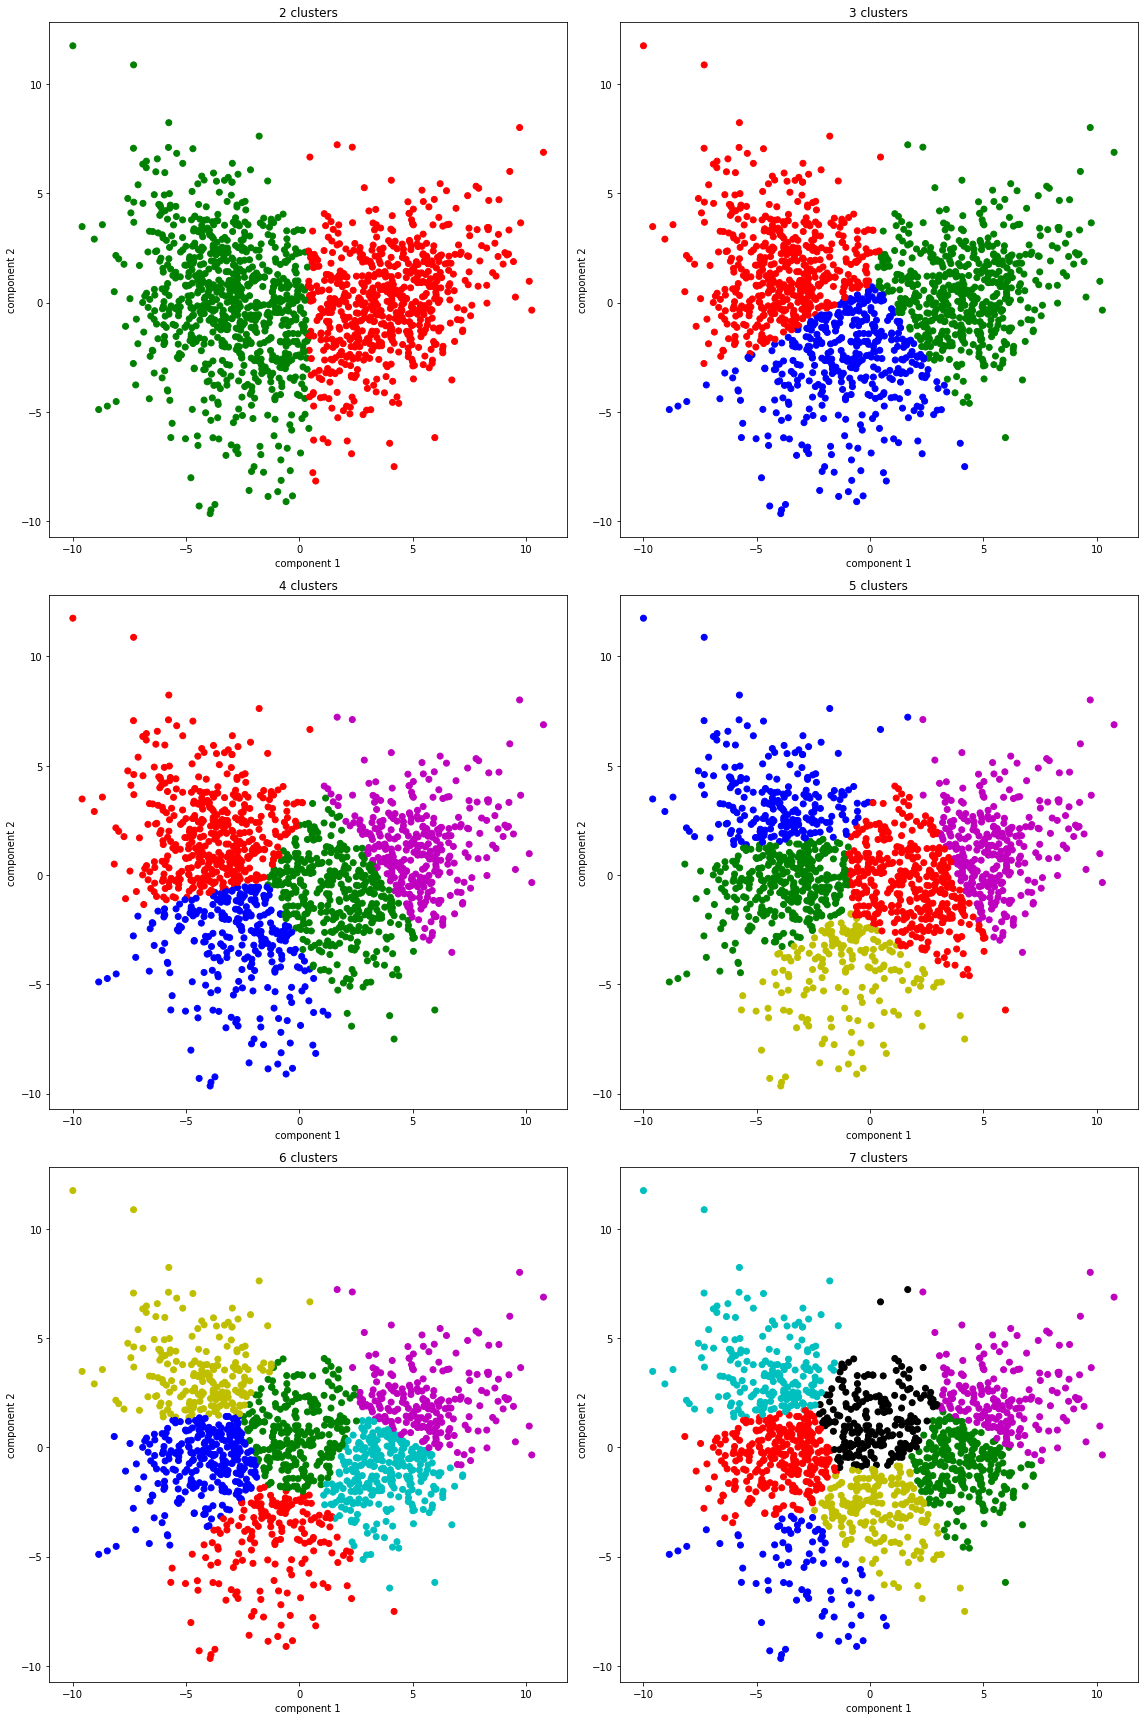

In [9]:
print("\tAnother graphing method using KMeans clustering\n")
plt.clf()
reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
 
def addSubPlot(subplt_n, reduced_data, n_clustrs):
    axes[subplt_n].set_title('{} clusters'.format(n_clustrs)) 

    km = KM(n_clusters=n_clustrs, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(reduced_data)
    color_no = np.array(km.labels_)
    colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
    colors = []
    for i in color_no:
        colors.append(colors_dict[i])
    axes[subplt_n].scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1], color=colors)
for i in range(2,8):
    addSubPlot(i-2, reduced_data, i)
for ax in axes:
    ax.set(xlabel='component 1', ylabel='component 2')
plt.tight_layout()
plt.show()

	Using Agglomerative clustering



<Figure size 432x288 with 0 Axes>

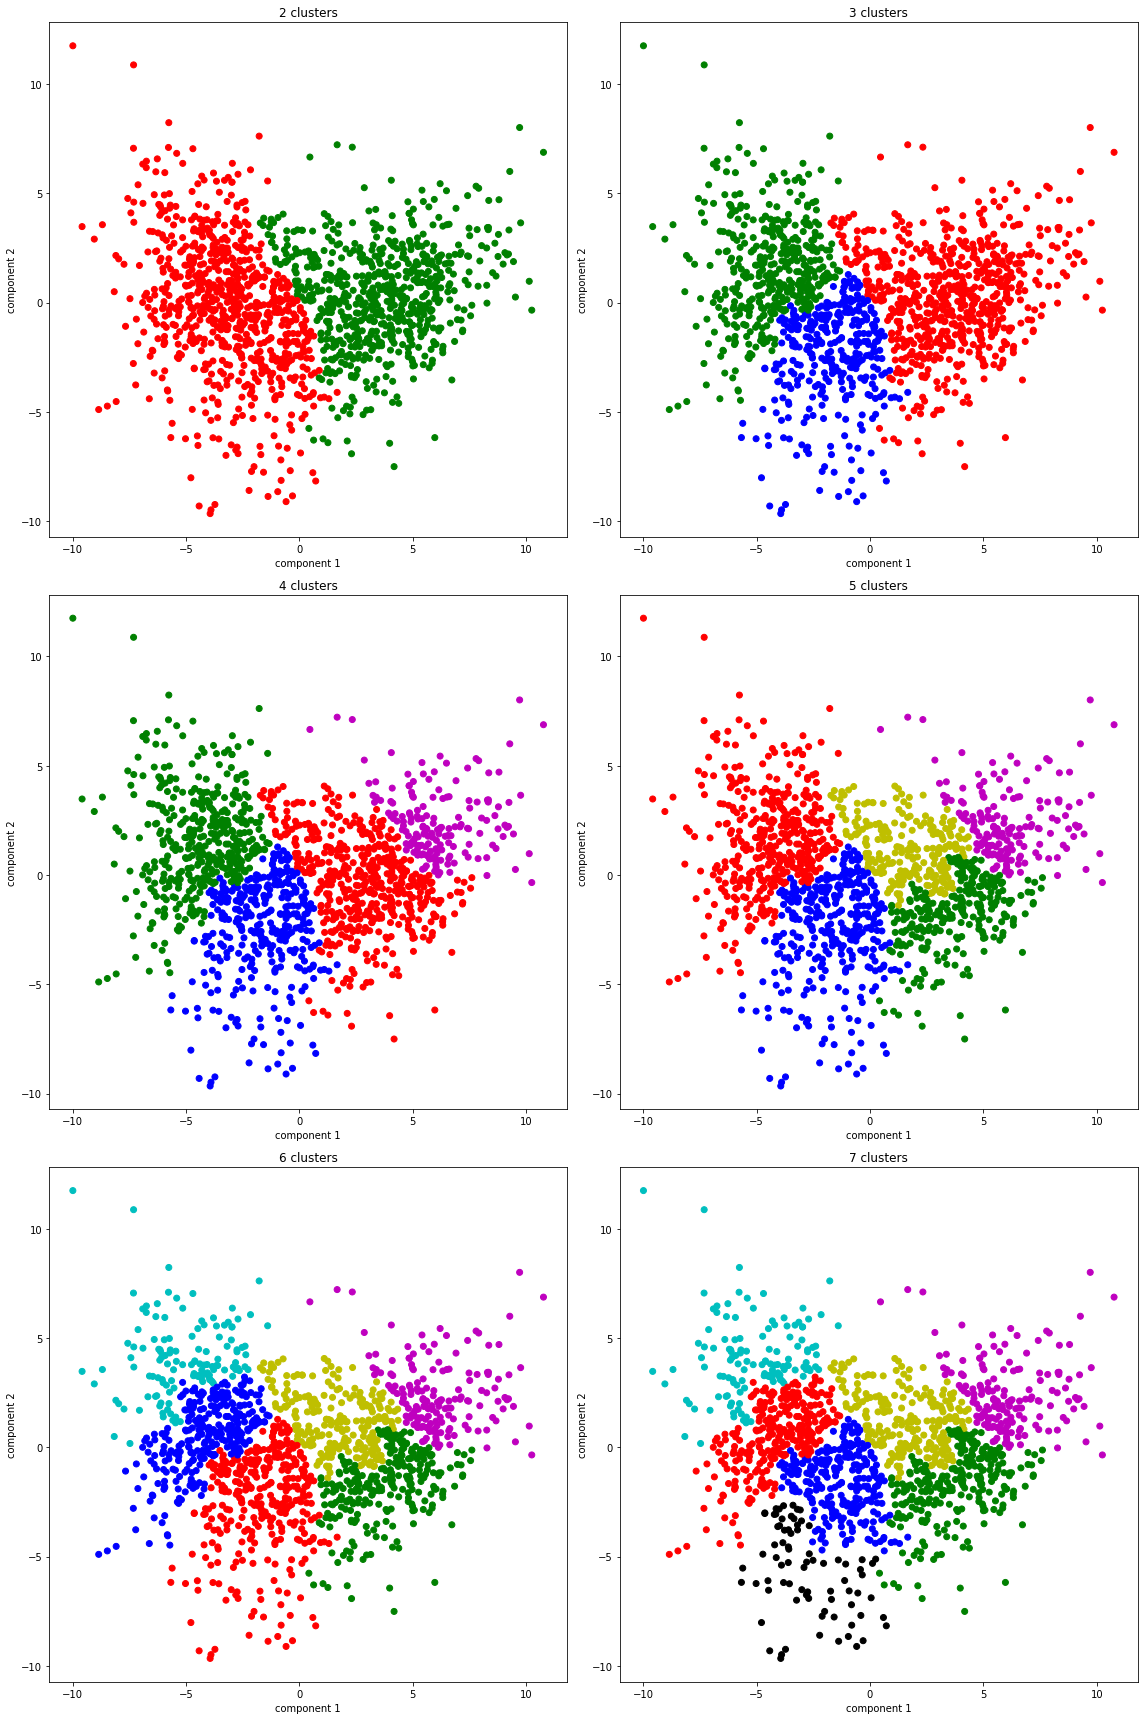

In [10]:
print("\tUsing Agglomerative clustering\n")
plt.clf()
reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
 
def addSubPlot(subplt_n, reduced_data, n_clstrs):
    axes[subplt_n].set_title('{} clusters'.format(str(n_clstrs))) 

    agc = AgC(n_clusters=n_clstrs)
    agc.fit(reduced_data)

    color_no = np.array(agc.labels_)
    colors_dict = ['r','g','b','m','y','c','k']
    colors = []
    for i in color_no:
        colors.append(colors_dict[i])
    axes[subplt_n].scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1], color=colors)
for i in range(2,8):
    addSubPlot(i-2, reduced_data, i)
for ax in axes:
    ax.set(xlabel='component 1', ylabel='component 2')
plt.tight_layout()
plt.show()

	Using Spectral clustering



<Figure size 432x288 with 0 Axes>

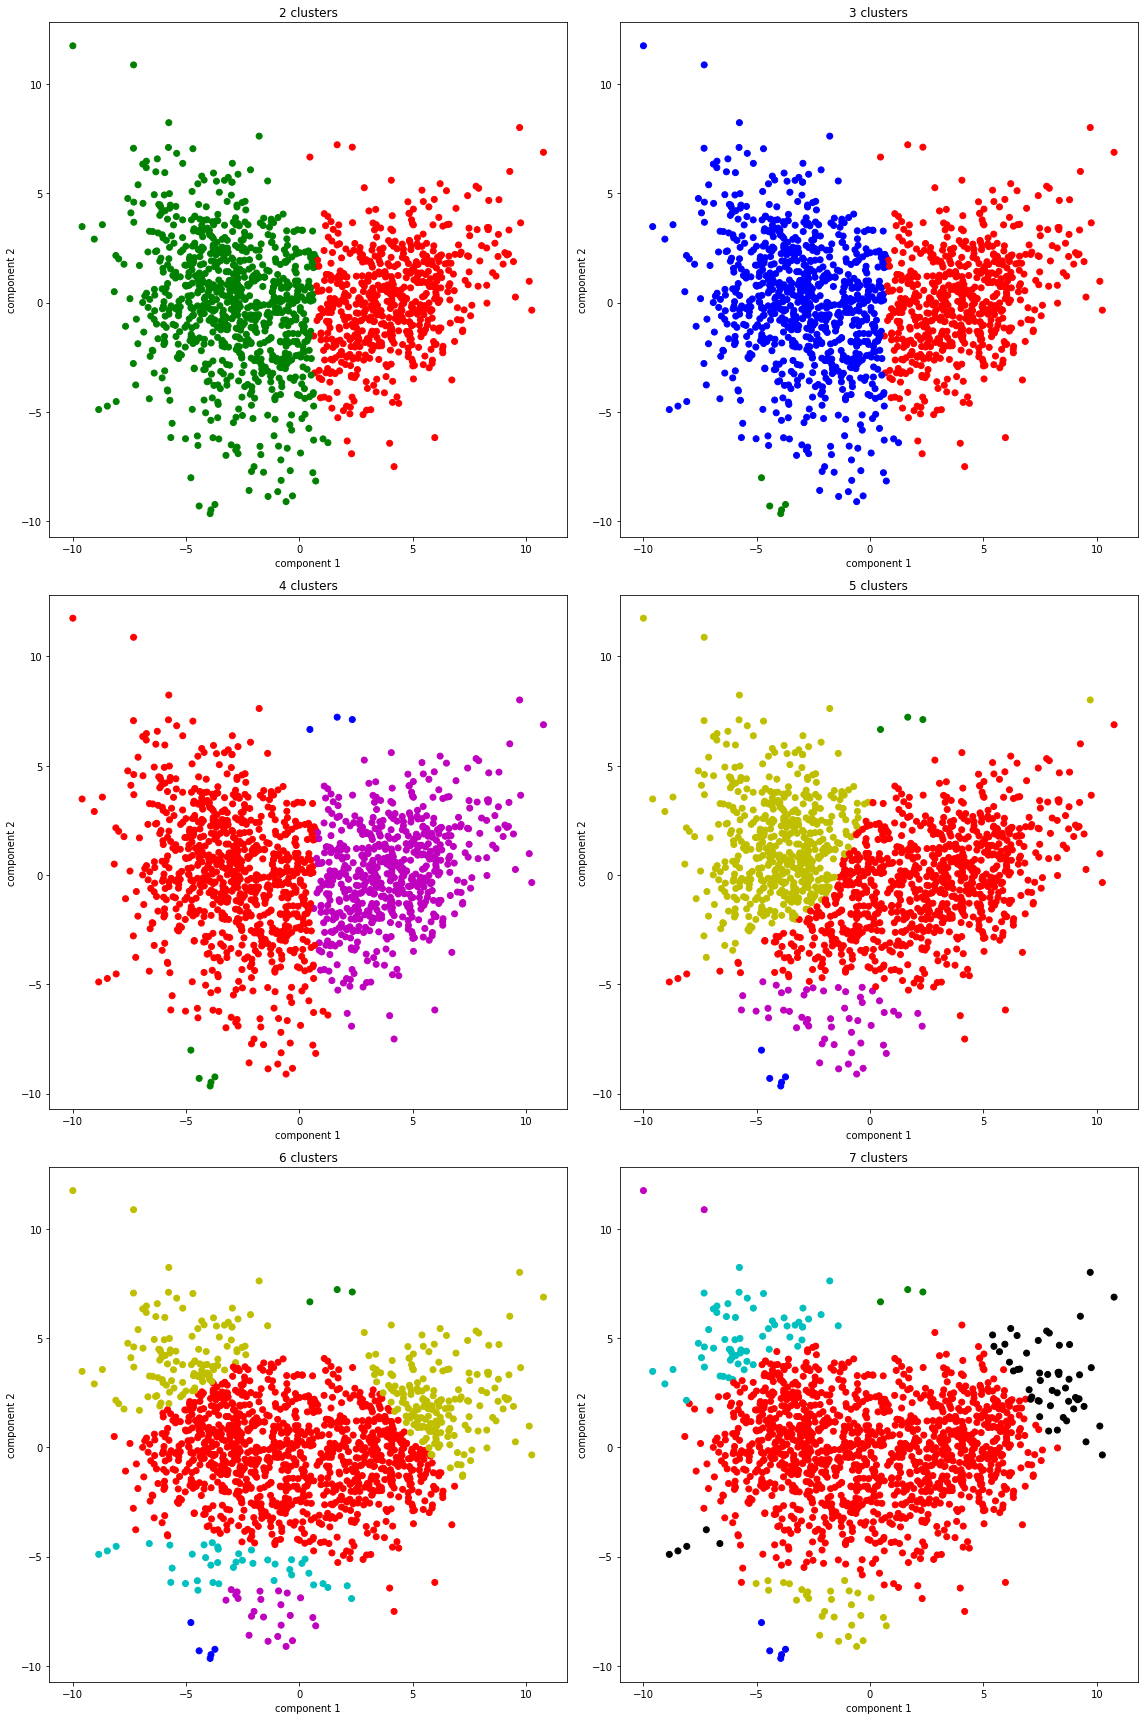

In [11]:
print("\tUsing Spectral clustering\n")
plt.clf()
reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
 
def addSubPlot(subplt_n, reduced_data, n_clstrs):
    axes[subplt_n].set_title('{} clusters'.format(str(n_clstrs))) 

    spc = SpC(n_clusters=n_clstrs)
    spc.fit(reduced_data)

    color_no = np.array(spc.labels_)
    colors_dict = ['r','g','b','m','y','c','k']
    colors = []
    for i in color_no:
        colors.append(colors_dict[i])
    axes[subplt_n].scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1], color=colors)
for i in range(2,8):
    addSubPlot(i-2, reduced_data, i)
for ax in axes:
    ax.set(xlabel='component 1', ylabel='component 2')
plt.tight_layout()
plt.show()

	Using DBSCAN clustering



<Figure size 432x288 with 0 Axes>

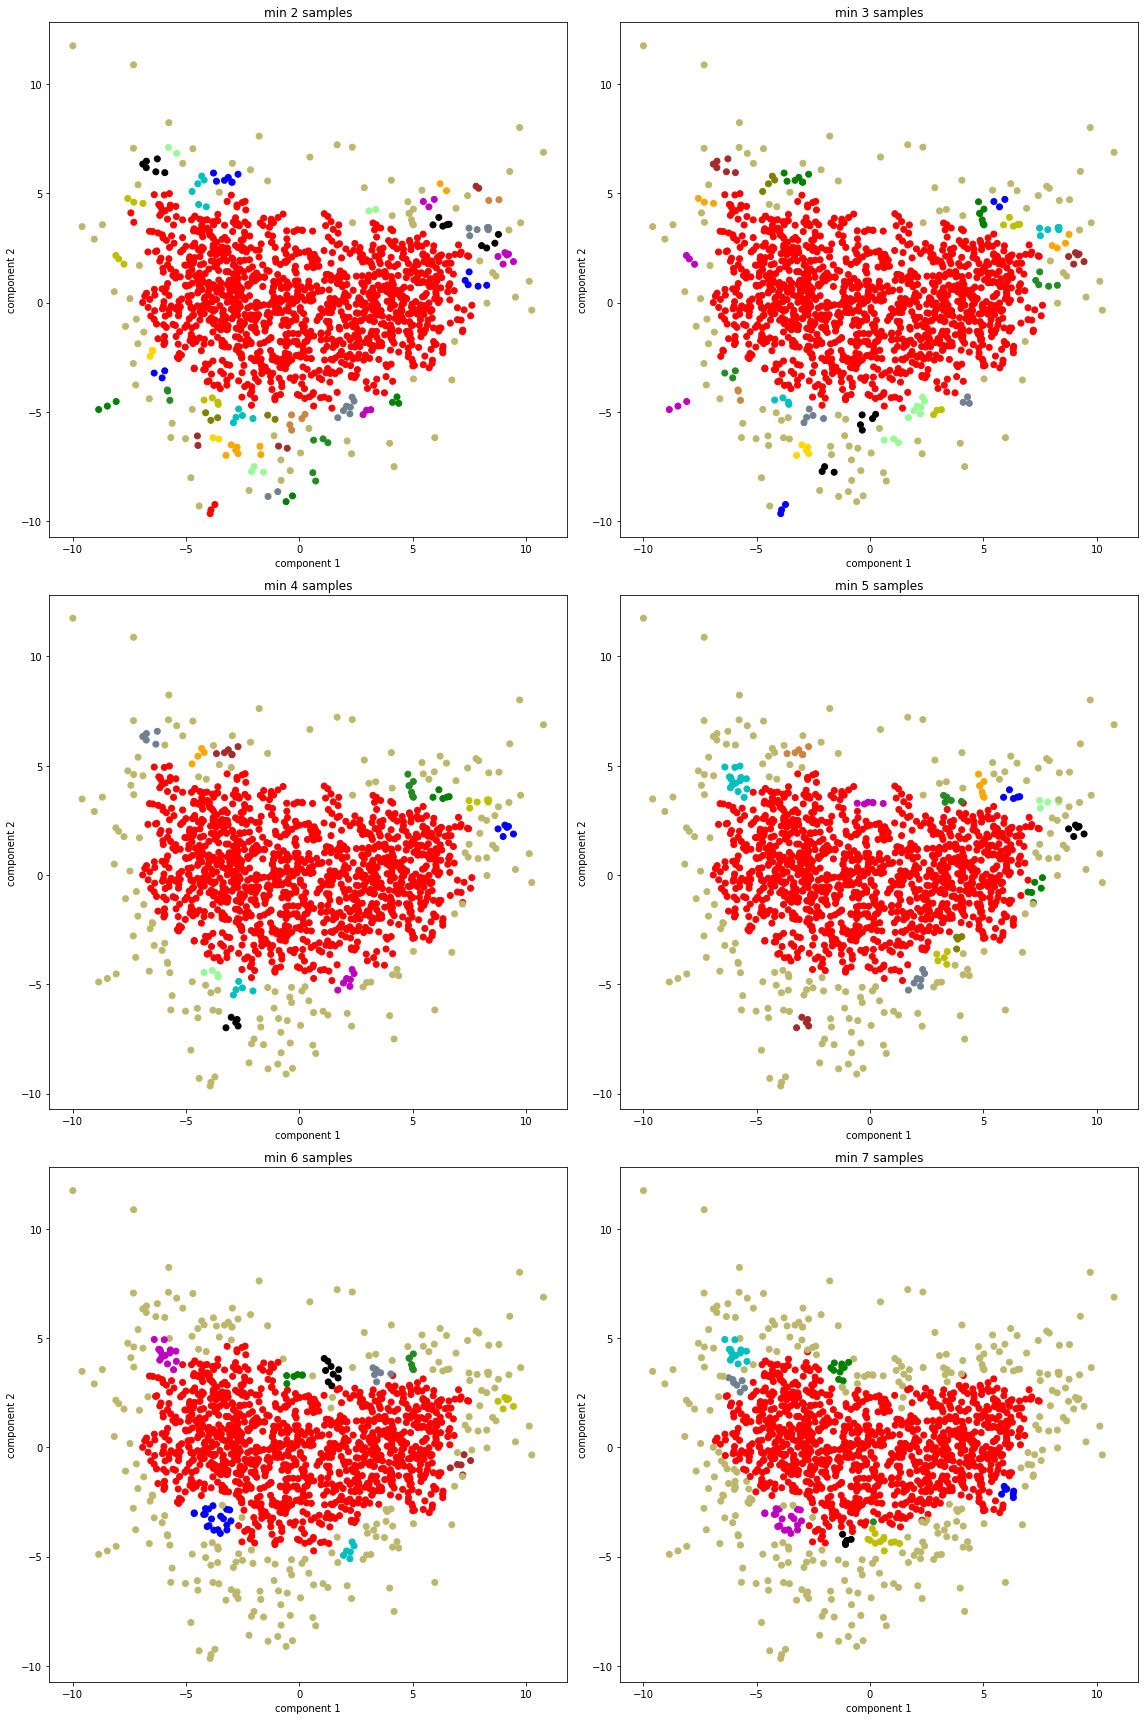

In [12]:
print("\tUsing DBSCAN clustering\n")
plt.clf()
reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
 
def addSubPlot(subplt_n, reduced_data, min_smpls):
    axes[subplt_n].set_title('min {} samples'.format(str(min_smpls))) 

    dbs = DBS(min_samples=min_smpls)
    dbs.fit(reduced_data)
    color_no = np.array(dbs.labels_)
    colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
    colors = []
    for i in color_no:
        colors.append(colors_dict[i])
    axes[subplt_n].scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1], color=colors)
for i in range(2,8):
    addSubPlot(i-2, reduced_data, i)
for ax in axes:
    ax.set(xlabel='component 1', ylabel='component 2')
plt.tight_layout()
plt.show()

	Using DBSCAN clustering on the data



<Figure size 432x288 with 0 Axes>

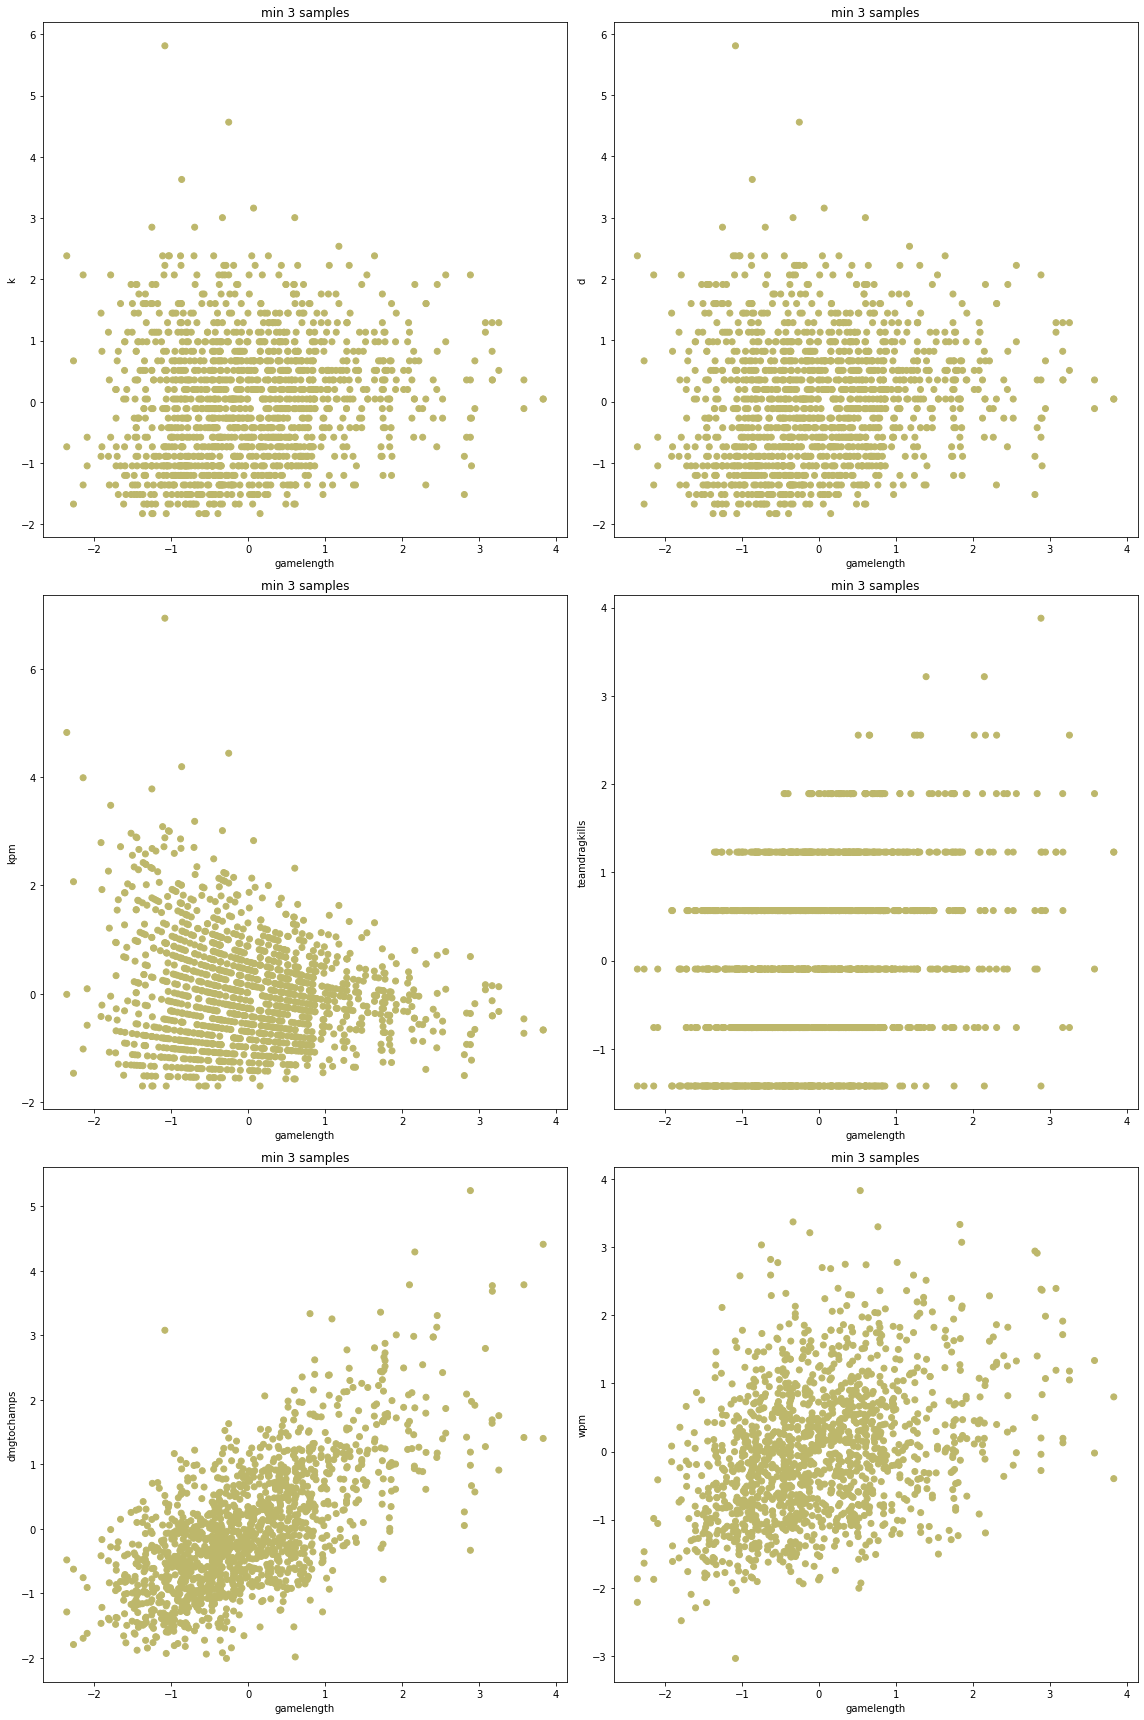

In [13]:
print("\tUsing DBSCAN clustering on the data\n")
plt.clf()
interesting_variables = [7,8,11,16,34,37]
#reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
 
dbs = DBS(eps =1.5, min_samples=3)
dbs.fit(data)
color_no = np.array(dbs.labels_)
colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
colors = []
for i in color_no:
    colors.append(colors_dict[i])
    
def addSubPlot(subplt_n, reduced_data, min_smpls):
    axes[subplt_n].set_title('min {} samples'.format(min_smpls)) 

    axes[subplt_n].scatter(data.iloc[:,5], data.iloc[:,interesting_variables[subplt_n]], color=colors)
    
for i in range(2,8):
    addSubPlot(i-2, reduced_data, i)
idx = 0
for ax in axes:
    ax.set(xlabel=var[5], ylabel=var[interesting_variables[idx]])
    idx += 1
plt.tight_layout()
plt.show()

	Using DBSCAN clustering



<Figure size 432x288 with 0 Axes>

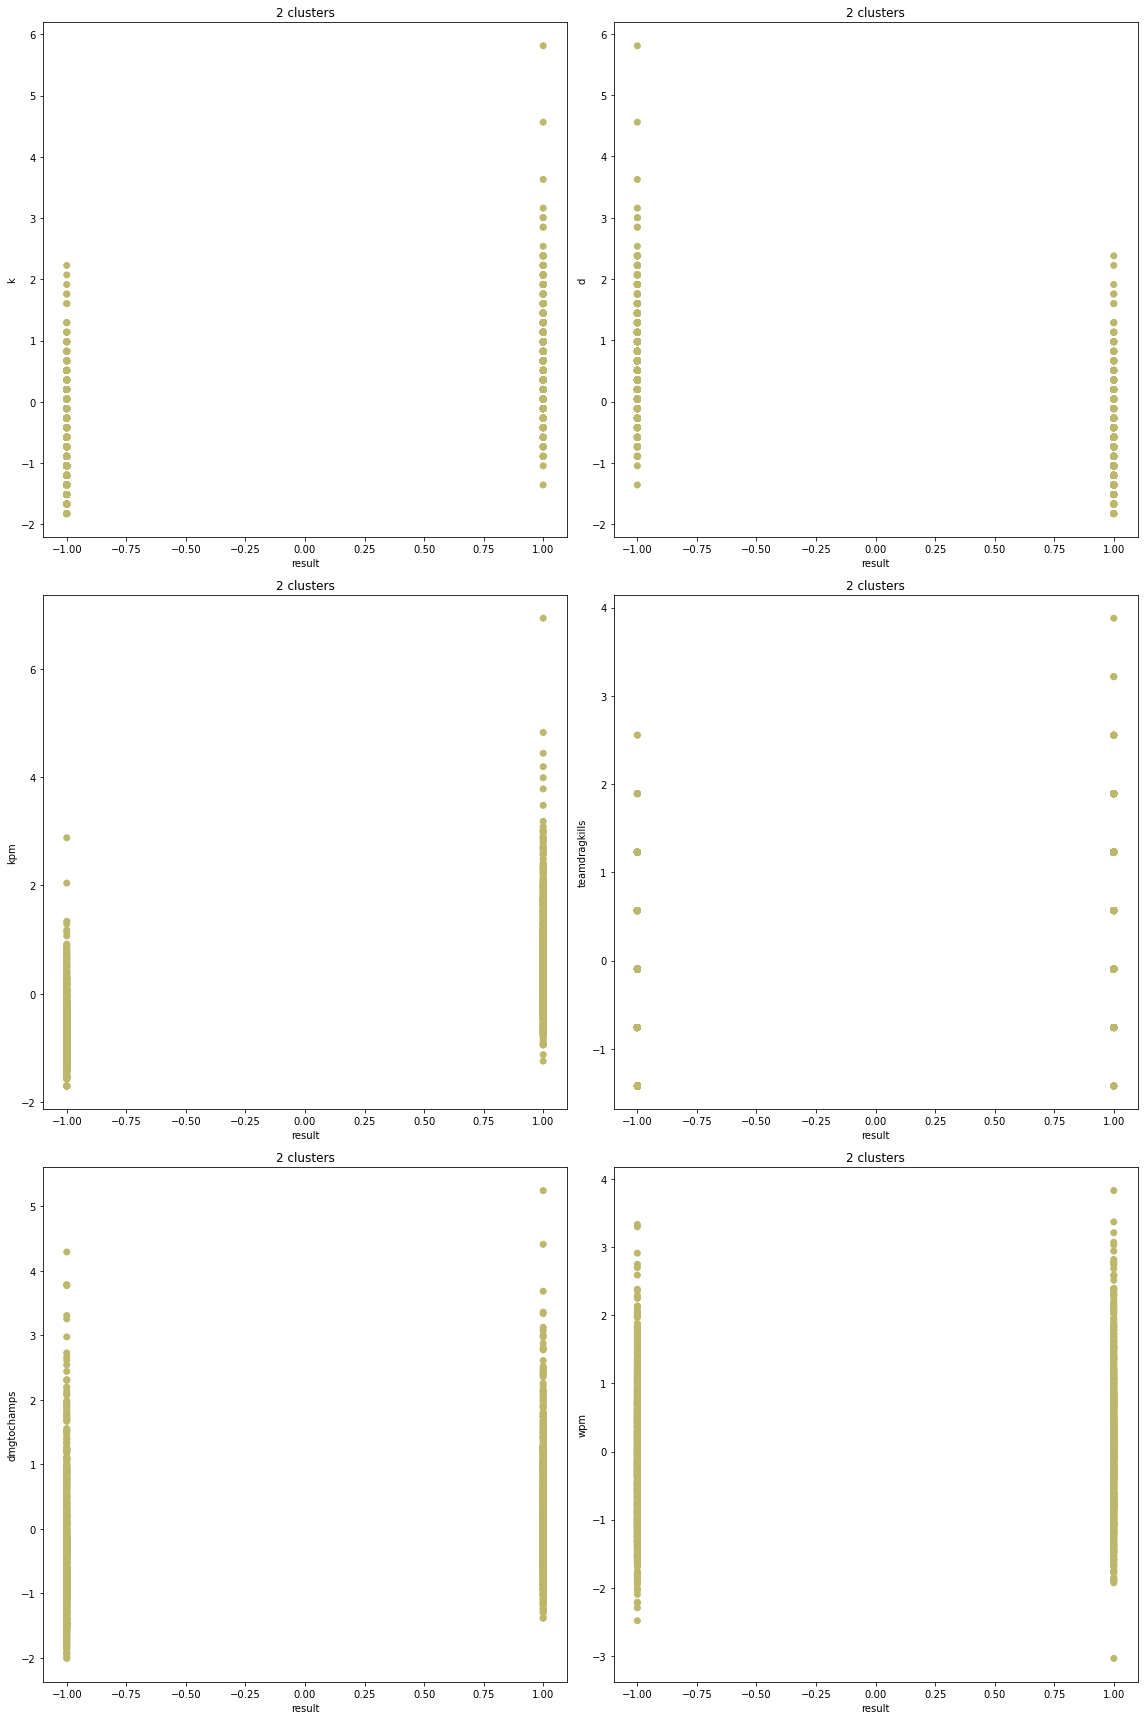

In [14]:
print("\tUsing DBSCAN clustering\n")
plt.clf()
interesting_variables = [7,8,11,16,34,37]
#reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]

dbs = DBS(min_samples=3)
dbs.fit(data)
color_no = np.array(dbs.labels_)
colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
colors = []
for i in color_no:
    colors.append(colors_dict[i])
 
def addSubPlot(subplt_n, reduced_data, n_clstrs):
    axes[subplt_n].set_title('{} clusters'.format(str(n_clstrs)))
    axes[subplt_n].scatter(data.iloc[:,6], data.iloc[:,interesting_variables[subplt_n]], color=colors)
    
for i in range(2,8):
    addSubPlot(i-2, reduced_data, i)
idx = 0
for ax in axes:
    ax.set(xlabel=var[6], ylabel=var[interesting_variables[idx]])
    idx += 1
plt.tight_layout()
plt.show()

##### I've tried playing with the variables a fair bit but I can't seem to get DBSCAN to make multiple clusters

	Using KMeans clustering on the data



<Figure size 432x288 with 0 Axes>

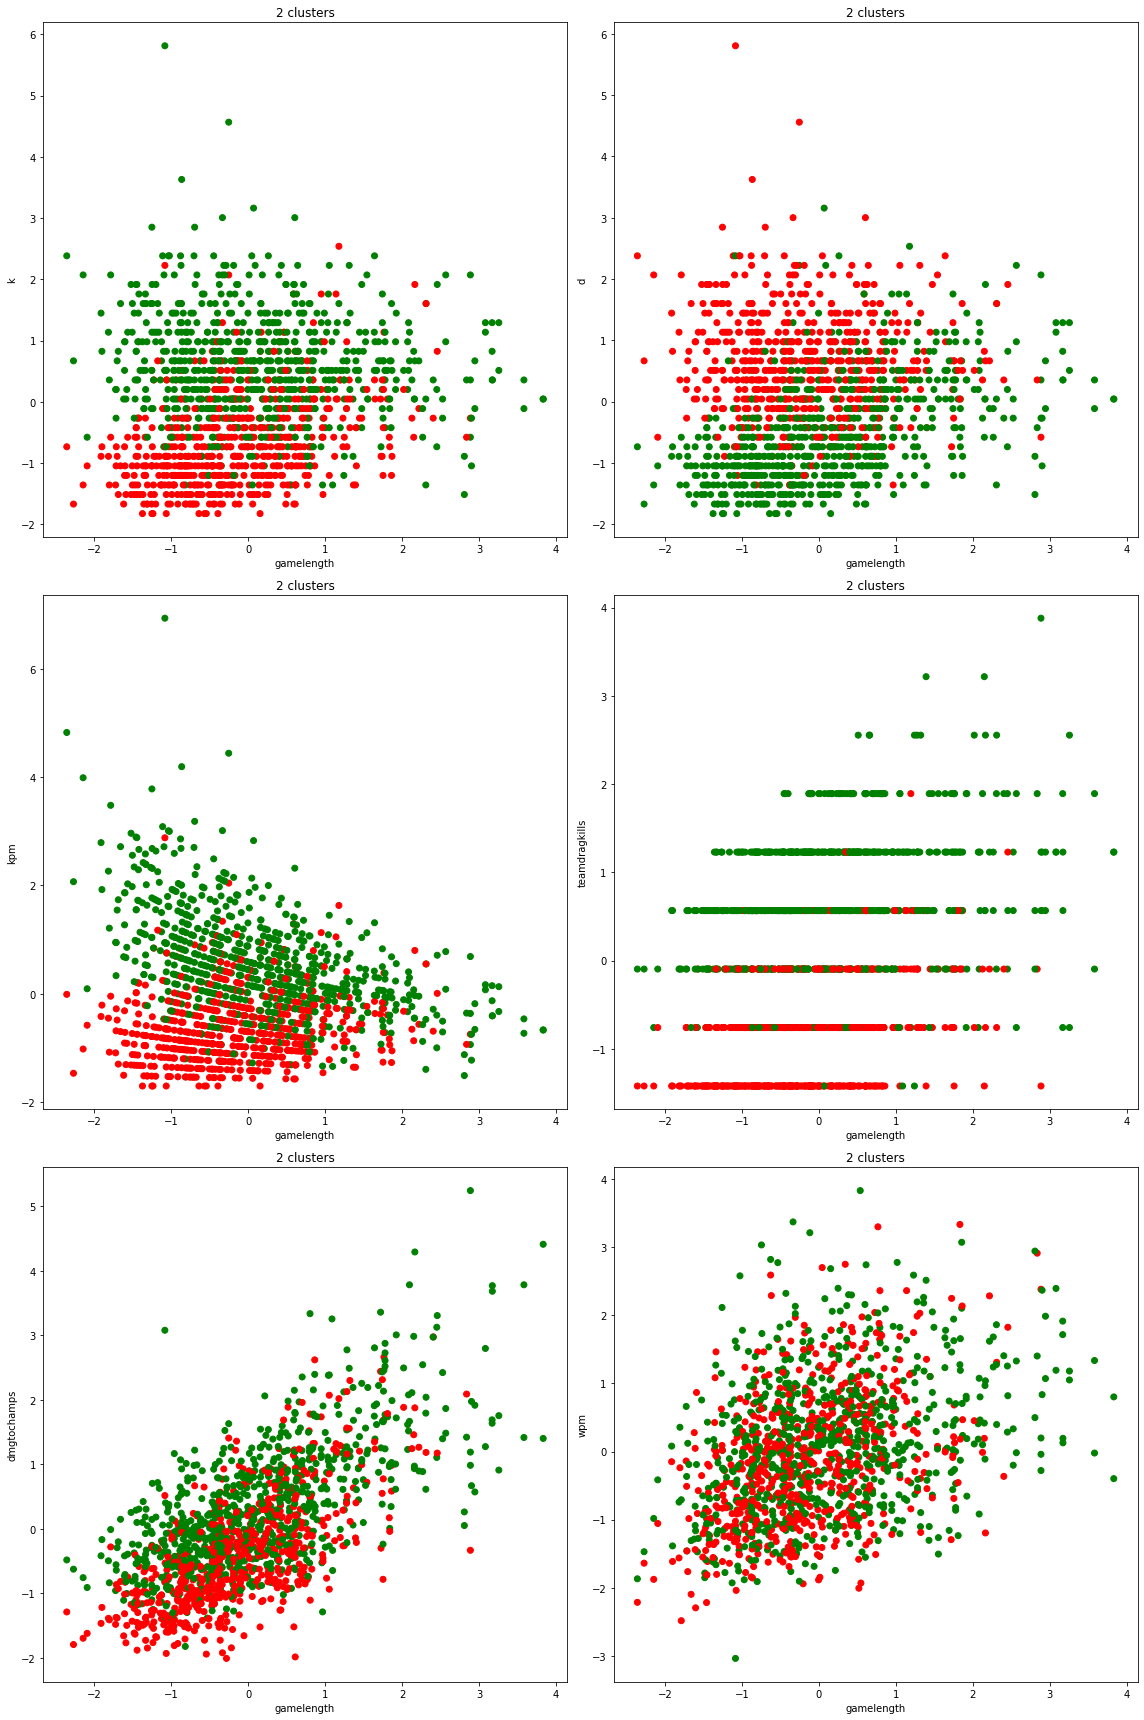

In [15]:
print("\tUsing KMeans clustering on the data\n")
plt.clf()
interesting_variables = [7,8,11,16,34,37]
#reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
 
dbs = KM(init='k-means++', n_clusters=2, n_init=10)
dbs.fit(data)
    
color_no = np.array(dbs.labels_)
colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
colors = []
for i in color_no:
    colors.append(colors_dict[i])
    
def addSubPlot(subplt_n, reduced_data, n_clstrs):
    axes[subplt_n].set_title('{} clusters'.format(str(2))) 

    axes[subplt_n].scatter(data.iloc[:,5], data.iloc[:,interesting_variables[subplt_n]], color=colors)
for i in range(2,8):
    addSubPlot(i-2, reduced_data, i)
idx = 0
for ax in axes:
    ax.set(xlabel=var[5], ylabel=var[interesting_variables[idx]])
    idx += 1
plt.tight_layout()
plt.show()

	Using KMeans clustering



<Figure size 432x288 with 0 Axes>

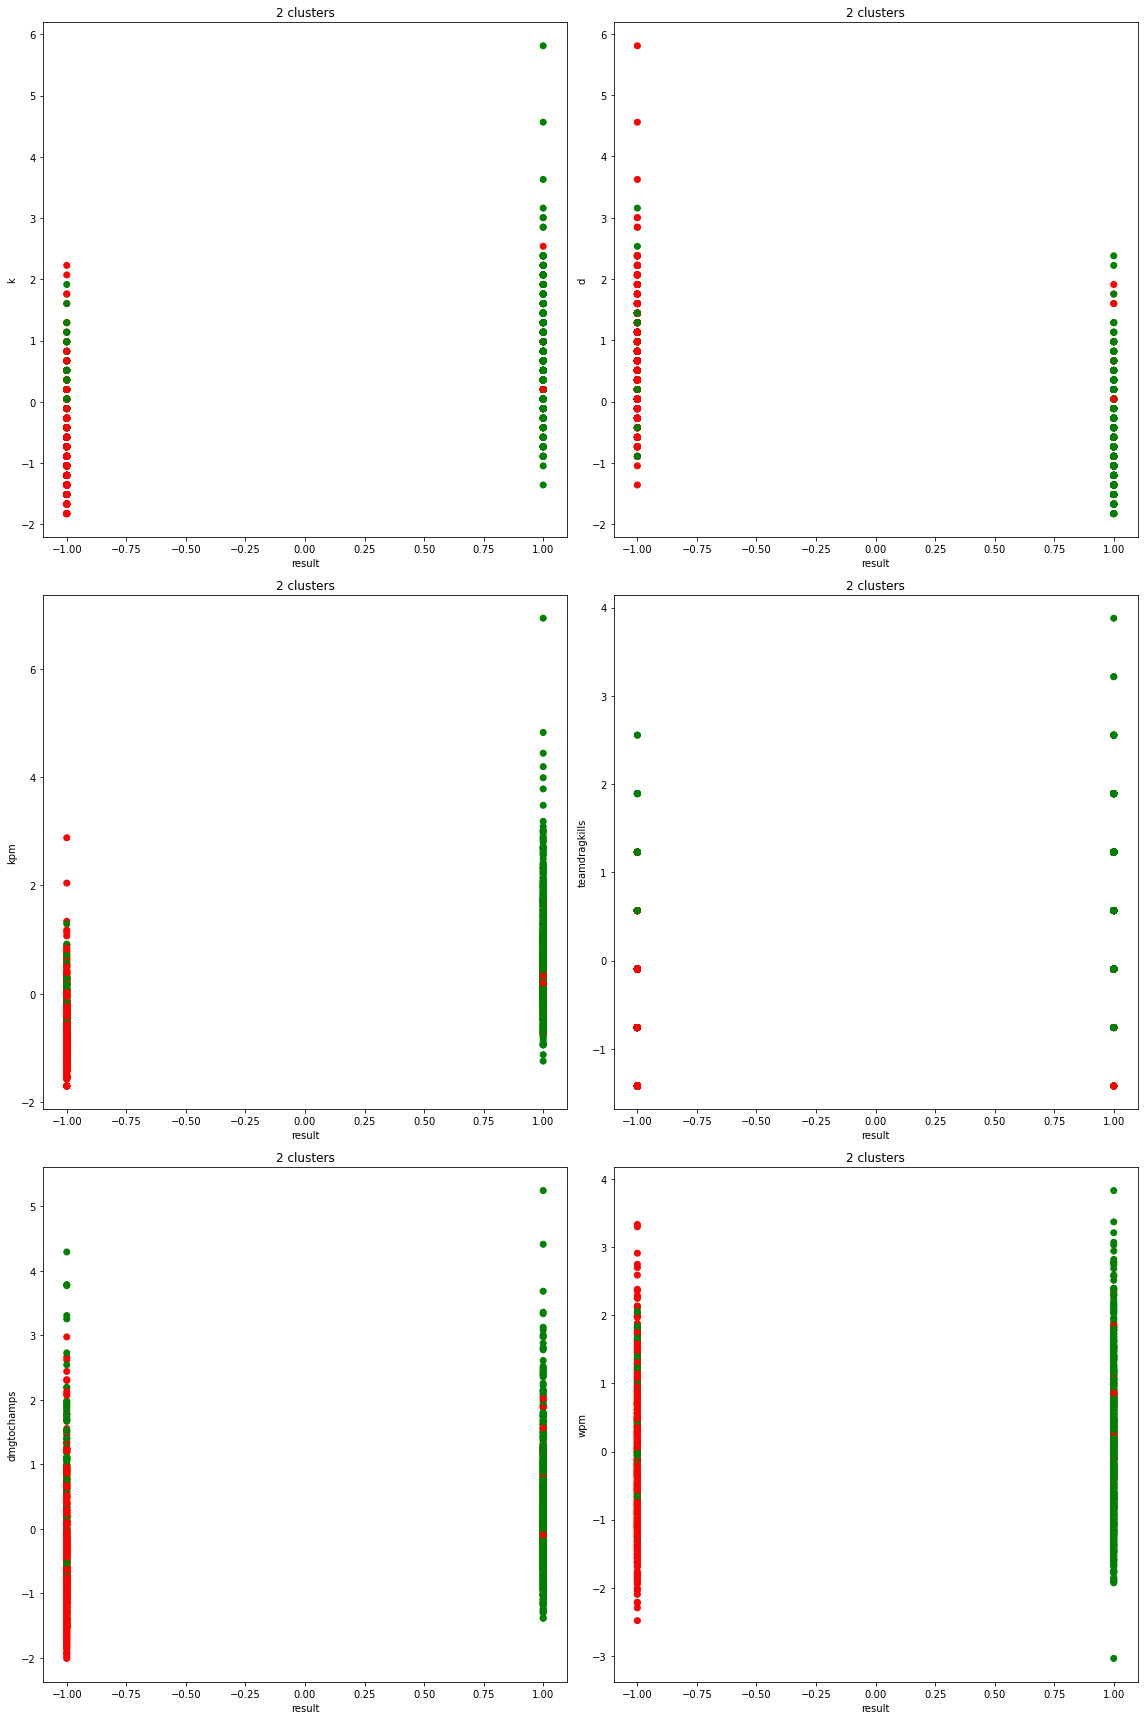

In [16]:
print("\tUsing KMeans clustering\n")
plt.clf()
interesting_variables = [7,8,11,16,34,37]
#reduced_data = pd.DataFrame(PCA(n_components=2).fit_transform(data))

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2,figsize=(16,24))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]

dbs = KM(init='k-means++', n_clusters=2, n_init=10)
dbs.fit(data)
color_no = np.array(dbs.labels_)
colors_dict = ['r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki',
               'r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki','r','g','b','m','y','c','k','slategrey','forestgreen','brown','orange','palegreen','peru','olive','gold','darkkhaki']
colors = []
for i in color_no:
    colors.append(colors_dict[i])
 
def addSubPlot(subplt_n, reduced_data, n_clstrs):
    axes[subplt_n].set_title('{} clusters'.format(str(2)))
    axes[subplt_n].scatter(data.iloc[:,6], data.iloc[:,interesting_variables[subplt_n]], color=colors)
    
for i in range(2,8):
    addSubPlot(i-2, reduced_data, i)
idx = 0
for ax in axes:
    ax.set(xlabel=var[6], ylabel=var[interesting_variables[idx]])
    idx += 1
plt.tight_layout()
plt.show()

##### It seems like KMeans at 2 clusters is identifying a pattern based on how well a team is doing in the game, though it's not definitive which could be due to the variability due to the games being played by humans.